In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


In [55]:
df=pd.read_csv('/kaggle/input/iris-dataset/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [57]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [58]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
enc=LabelEncoder()
df['species']=enc.fit_transform(df['species'])

In [61]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [62]:
X=df.drop(columns=['species'])
y=df['species']

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [65]:
X_train_scaled

array([[0.52777778, 0.33333333, 0.6440678 , 0.70833333],
       [0.22222222, 0.54166667, 0.11864407, 0.16666667],
       [0.36111111, 0.375     , 0.44067797, 0.5       ],
       [0.94444444, 0.75      , 0.96610169, 0.875     ],
       [0.30555556, 0.41666667, 0.59322034, 0.58333333],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.58333333, 0.33333333, 0.77966102, 0.875     ],
       [0.5       , 0.41666667, 0.61016949, 0.54166667],
       [0.33333333, 0.125     , 0.50847458, 0.5       ],
       [0.72222222, 0.45833333, 0.69491525, 0.91666667],
       [0.47222222, 0.375     , 0.59322034, 0.58333333],
       [0.52777778, 0.375     , 0.55932203, 0.5       ],
       [0.69444444, 0.5       , 0.83050847, 0.91666667],
       [0.19444444, 0.125     , 0.38983051, 0.375     ],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.5       , 0.25      , 0.77966102, 0.54166667],
       [0.25      , 0.58333333, 0.06779661, 0.04166667],
       [0.66666667, 0.45833333,

In [66]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [67]:
model=Sequential()

In [68]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [69]:
model.add(Dense(6,activation='relu',input_dim=4))
model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │            70 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133 (532.00 B)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)

In [75]:
history=model.fit(X_train_scaled,y_train,epochs=1000)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3832 
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4046 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3817 
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3971 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3880 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3467 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3693 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3616 
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3705 
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3611 
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3508 
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3685 
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3692 
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3810 
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3521 
Epoc

In [76]:
y_prob=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [77]:
y_pred=y_prob.argmax(axis=1)
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

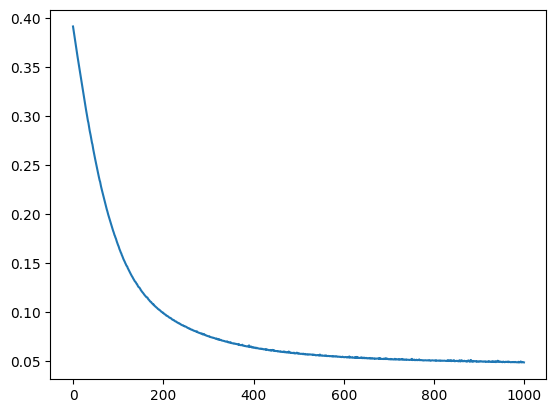

In [81]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])